## Calculate climatology, anomalies with respect to climatology, monthly mean, and running average

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# Read data
DIR = '/nfs/spare11/env315/data/'
datafile = DIR+'era5_u1060_daily_1980-2019.nc'
data = xr.open_mfdataset(datafile).compute()
data = data.u_component_of_wind
data

<xarray.DataArray 'u_component_of_wind' (time: 14610)> Size: 58kB
array([33.964096, 37.398537, 38.92926 , ..., 41.941204, 40.91121 ,
       41.22743 ], dtype=float32)
Coordinates:
    lat      float64 8B 60.0
    plev     float64 8B 1e+03
  * time     (time) datetime64[ns] 117kB 1980-01-01T09:00:00 ... 2019-12-31T0...

## Calculate monthly mean from daily values
### There are more than one method that can do this, here we use .resample()
### .resample() is the resampling operation. It groups the data into time intervals based on the specified frequency.
### Here we choose the resample frequency time=1ME, which time='1ME', meaning a period of 1 month. ME stands for "month end." It means the end of each month.
### Therefore, time='1ME' tells xarray to group your data into intervals that represent the end of each month.
### .mean() is the aggregation operation. It calculates the mean of the data values within each resampled time interval (the month-end intervals in this case).

In [5]:
u1060_monthly = data.resample(time='1ME').mean()
u1060_monthly

<xarray.DataArray 'u_component_of_wind' (time: 480)> Size: 2kB
array([ 4.23538055e+01,  3.27022743e+01,  1.90834081e+00, -1.23738348e+00,
       -7.39648056e+00, -1.11657143e+01, -9.95206833e+00, -3.06636453e+00,
        9.66489697e+00,  1.67572002e+01,  2.96746693e+01,  5.11083870e+01,
        5.19549294e+01,  1.38870935e+01,  9.52951050e+00,  1.09238071e+01,
       -7.89297760e-01, -8.59584332e+00, -9.15602970e+00, -2.94238615e+00,
        7.09988451e+00,  1.80389671e+01,  2.47764244e+01,  2.35631332e+01,
        2.98942909e+01,  2.46152153e+01,  2.19645405e+01, -8.25290489e+00,
       -1.25946817e+01, -1.27163782e+01, -1.07615623e+01, -3.13730979e+00,
        7.70066643e+00,  1.95255051e+01,  3.50741997e+01,  4.44031563e+01,
        4.69315872e+01,  1.97864056e+01,  6.11172199e+00, -1.21492612e+00,
       -4.25370169e+00, -1.14755497e+01, -1.03097067e+01, -2.07725406e+00,
        8.37155437e+00,  2.19970474e+01,  2.97169132e+01,  4.14214439e+01,
        5.13345947e+01,  2.44361992e+01, -5.02144670e+00,  6.09889448e-01,
       -4.17568111e+00, -1.10714655e+01, -1.19762344e+01, -4.06732798e+00,
        8.18431950e+00,  1.84413013e+01,  2.55396404e+01,  2.93572559e+01,
        5.00036192e+00,  2.08893871e+01,  9.79387760e+00, -4.34182262e+00,
       -7.60904121e+00, -1.19638977e+01, -1.14794893e+01, -3.04004407e+00,
        8.48642731e+00,  2.08528919e+01,  3.02080708e+01,  4.70774918e+01,
        3.61043282e+01,  3.32464752e+01,  6.76985550e+00, -8.83008003e+00,
       -8.73450089e+00, -1.19272070e+01, -1.05975828e+01, -3.35925221e+00,
...
        6.93996859e+00,  1.60252552e+01,  3.22834969e+01,  4.84549103e+01,
        4.14832497e+01,  2.83010750e+01,  1.06729164e+01, -7.50687981e+00,
       -1.04161873e+01, -1.11931953e+01, -1.04988213e+01, -3.23621368e+00,
        6.45607090e+00,  1.66265202e+01,  2.40548992e+01,  3.75479202e+01,
        2.17521477e+01,  2.76832752e+01,  2.38044529e+01, -1.30530682e+01,
       -1.22624435e+01, -1.28065071e+01, -1.08056126e+01, -2.28875613e+00,
        8.74457073e+00,  2.06346359e+01,  3.83431282e+01,  5.25966644e+01,
        5.12888870e+01,  3.05136909e+01, -1.15196600e+01, -4.97763395e+00,
       -5.95077991e+00, -1.06839685e+01, -1.04695644e+01, -3.39378095e+00,
        5.90645313e+00,  1.71258640e+01,  1.32398348e+01,  3.72561302e+01,
        3.75116730e+01,  1.25317392e+01,  7.75134325e+00, -2.16499162e+00,
       -6.27082157e+00, -1.00991726e+01, -9.61159325e+00, -2.84316158e+00,
        8.19176674e+00,  1.82312851e+01,  2.86347790e+01,  2.54999161e+01,
        4.16536179e+01,  2.74412966e+00,  5.02793598e+00,  9.92868781e-01,
       -5.64634085e+00, -1.08866405e+01, -1.01315584e+01, -2.42415571e+00,
        7.34123325e+00,  2.17649384e+01,  3.02165794e+01,  2.18605251e+01,
       -1.01455009e+00,  2.66134510e+01,  3.86330376e+01,  1.11491394e+01,
       -1.48766479e+01, -1.41383705e+01, -1.19522381e+01, -4.96671629e+00,
        6.90509701e+00,  2.04196281e+01,  3.08538380e+01,  3.51952209e+01],
      dtype=float32)
Coordinates:
    lat      float64 8B 60.0
    plev     float64 8B 1e+03
  * time     (time) datetime64[ns] 4kB 1980-01-31 1980-02-29 ... 2019-12-31

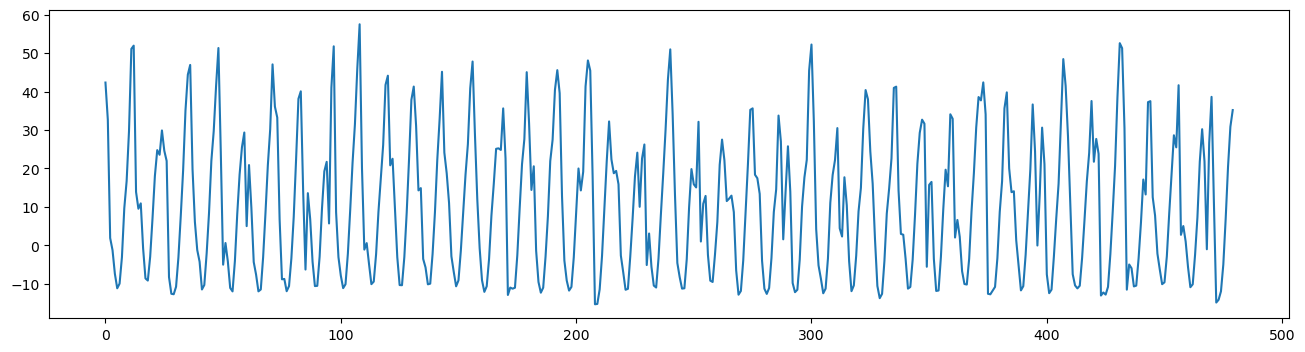

In [6]:
# plot the u1060_monthly data
fig = plt.figure(figsize =(16, 4))
plt.plot(u1060_monthly)

## Calculate daily climatology
### Climatology is done by grouping data by day/month of the year and calculating the mean for each group. We are doing so by using .groupby() method in Python.
### .groupby() method splits your xarray into groups based on the values of the specified coordinate(s) or other criteria.
### .mean() is to apply the mean function to each group. 
<span style="font-size: 24px; color: red; font-weight: bold;">We use .groupby("time.dayofyear") to group each day of the year in this case. How many groups do you think we will have? What will be in each group?</span>

In [7]:
u1060_clim = data.groupby("time.dayofyear").mean("time")
u1060_clim

<xarray.DataArray 'u_component_of_wind' (dayofyear: 366)> Size: 1kB
array([ 3.54601173e+01,  3.53185043e+01,  3.56586037e+01,  3.54111557e+01,
        3.47998428e+01,  3.47195129e+01,  3.45890732e+01,  3.45135078e+01,
        3.45221329e+01,  3.51280556e+01,  3.55638771e+01,  3.54127502e+01,
        3.56271553e+01,  3.54462433e+01,  3.50614624e+01,  3.45265579e+01,
        3.39369125e+01,  3.30688324e+01,  3.26891098e+01,  3.24942856e+01,
        3.15682335e+01,  3.04311123e+01,  2.90617161e+01,  2.75293083e+01,
        2.63643646e+01,  2.53067551e+01,  2.45739250e+01,  2.45505028e+01,
        2.44267197e+01,  2.48440552e+01,  2.45514545e+01,  2.40143929e+01,
        2.38062096e+01,  2.36268425e+01,  2.34128513e+01,  2.30455437e+01,
        2.27938423e+01,  2.30237770e+01,  2.31801682e+01,  2.28210869e+01,
        2.29760017e+01,  2.28294315e+01,  2.25666122e+01,  2.22537842e+01,
        2.18172684e+01,  2.17868118e+01,  2.17478676e+01,  2.12508373e+01,
        2.08683853e+01,  2.06168938e+01,  2.02969837e+01,  1.98312416e+01,
        1.93421745e+01,  1.89257336e+01,  1.80252075e+01,  1.72138634e+01,
        1.73232002e+01,  1.81208706e+01,  1.84819317e+01,  1.84197483e+01,
        1.76458817e+01,  1.78759575e+01,  1.81482162e+01,  1.83073273e+01,
        1.85965538e+01,  1.85489616e+01,  1.81595211e+01,  1.76492157e+01,
        1.68534393e+01,  1.58209553e+01,  1.48390226e+01,  1.40817614e+01,
        1.34462109e+01,  1.30526867e+01,  1.25901814e+01,  1.22632809e+01,
        1.23635883e+01,  1.23130388e+01,  1.18228426e+01,  1.11604252e+01,
...
        1.90730324e+01,  1.95306721e+01,  1.97244911e+01,  2.00039444e+01,
        2.03633766e+01,  2.07826462e+01,  2.12150612e+01,  2.14590778e+01,
        2.17305088e+01,  2.19413738e+01,  2.19949074e+01,  2.23610744e+01,
        2.28539886e+01,  2.32070045e+01,  2.35606861e+01,  2.40745506e+01,
        2.47368641e+01,  2.51380672e+01,  2.54555092e+01,  2.56932926e+01,
        2.55919991e+01,  2.57520714e+01,  2.61156101e+01,  2.67703552e+01,
        2.74371281e+01,  2.78369713e+01,  2.80308437e+01,  2.83403988e+01,
        2.85725136e+01,  2.88703461e+01,  2.90287933e+01,  2.91576042e+01,
        2.95348473e+01,  2.98477726e+01,  2.95957336e+01,  2.91559105e+01,
        2.87696495e+01,  2.88215294e+01,  2.90184059e+01,  2.90818367e+01,
        2.92539825e+01,  2.94456120e+01,  2.94930305e+01,  2.96112461e+01,
        2.99220028e+01,  2.97216339e+01,  2.94535618e+01,  2.93139992e+01,
        2.95507622e+01,  2.98653450e+01,  3.04631004e+01,  3.10009956e+01,
        3.15000515e+01,  3.22962608e+01,  3.31286697e+01,  3.40380669e+01,
        3.40542908e+01,  3.39557190e+01,  3.46954918e+01,  3.51899757e+01,
        3.53564682e+01,  3.53776093e+01,  3.57424927e+01,  3.52906532e+01,
        3.55754585e+01,  3.63665390e+01,  3.68352432e+01,  3.69791260e+01,
        3.67394409e+01,  3.70375404e+01,  3.76317940e+01,  3.80028267e+01,
        3.80257111e+01,  3.77702675e+01,  3.74547272e+01,  3.67739639e+01,
        3.64026108e+01,  4.04870224e+01], dtype=float32)
Coordinates:
    lat        float64 8B 60.0
    plev       float64 8B 1e+03
  * dayofyear  (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 361 362 363 364 365 366

### Calculate standard deviation of each day of the year

In [8]:
u1060_std = data.groupby("time.dayofyear").std("time")
u1060_std

<xarray.DataArray 'u_component_of_wind' (dayofyear: 366)> Size: 1kB
array([17.500967  , 18.750227  , 19.118246  , 18.690302  , 18.389156  ,
       18.75721   , 19.536917  , 19.867178  , 19.60905   , 19.359734  ,
       19.023155  , 18.412308  , 18.422697  , 18.873646  , 19.38703   ,
       19.650728  , 19.9129    , 20.091677  , 19.922005  , 19.393127  ,
       19.465546  , 19.653128  , 20.08688   , 20.293823  , 19.897018  ,
       19.538774  , 19.05036   , 18.247046  , 17.711208  , 17.481909  ,
       17.368317  , 16.821432  , 16.436478  , 16.856922  , 17.261768  ,
       17.332813  , 16.94176   , 16.796091  , 17.13799   , 17.702888  ,
       18.154999  , 18.368841  , 18.577316  , 18.286179  , 17.962816  ,
       17.05464   , 16.734392  , 16.365013  , 16.565401  , 16.614563  ,
       16.231197  , 15.873451  , 15.374077  , 15.257915  , 15.700656  ,
       16.291092  , 15.711627  , 15.265824  , 14.819002  , 14.189969  ,
       13.683479  , 13.326147  , 12.816532  , 12.893282  , 13.473342  ,
       13.983383  , 14.633817  , 14.418699  , 14.348826  , 14.175849  ,
       14.650405  , 15.123173  , 14.846572  , 15.101802  , 15.570271  ,
       14.952377  , 14.429315  , 13.776297  , 13.35774   , 12.868874  ,
       12.418452  , 12.34066   , 12.682498  , 12.498186  , 12.116694  ,
       11.952332  , 11.493914  , 11.453048  , 11.584115  , 11.433755  ,
       11.624308  , 11.32104   , 11.007282  , 10.78062   , 10.849438  ,
       10.597943  , 10.703526  , 10.650671  , 10.454341  , 10.130632  ,
...
        2.263958  ,  2.1952586 ,  2.3125722 ,  2.3102956 ,  2.2386868 ,
        2.2310562 ,  2.3810809 ,  2.622482  ,  2.8216872 ,  2.941968  ,
        3.0474992 ,  3.1645613 ,  3.2657266 ,  3.3486135 ,  3.2279375 ,
        3.219538  ,  3.304294  ,  3.458444  ,  3.4683635 ,  3.3378956 ,
        3.421088  ,  3.6150172 ,  3.8563805 ,  4.1435084 ,  4.2660966 ,
        4.4812326 ,  4.5652804 ,  4.5110345 ,  4.6366987 ,  4.9348016 ,
        5.28634   ,  5.6185117 ,  5.8704486 ,  5.977684  ,  6.099303  ,
        6.111425  ,  6.0981293 ,  6.1222396 ,  6.2122884 ,  6.165291  ,
        6.183657  ,  6.1712065 ,  6.2970347 ,  6.2277565 ,  6.20524   ,
        6.231286  ,  6.694466  ,  7.216477  ,  7.6060367 ,  7.7222652 ,
        8.093241  ,  8.436708  ,  8.572719  ,  9.186835  ,  9.900972  ,
       10.156069  , 10.134836  , 10.33182   , 10.439251  , 10.516207  ,
       10.540164  , 10.40252   , 10.3202305 , 10.302436  , 10.484426  ,
       10.693528  , 11.145101  , 11.952858  , 12.459742  , 12.898094  ,
       13.002559  , 12.911304  , 12.828335  , 13.217253  , 13.291965  ,
       12.796333  , 12.66589   , 12.723053  , 13.215529  , 13.973826  ,
       15.1039915 , 15.301581  , 14.804329  , 14.837439  , 14.460542  ,
       14.197367  , 14.446847  , 14.621394  , 14.881038  , 15.037759  ,
       15.318857  , 15.130831  , 15.363788  , 15.710562  , 16.269281  ,
       17.610859  ], dtype=float32)
Coordinates:
    lat        float64 8B 60.0
    plev       float64 8B 1e+03
  * dayofyear  (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 361 362 363 364 365 366

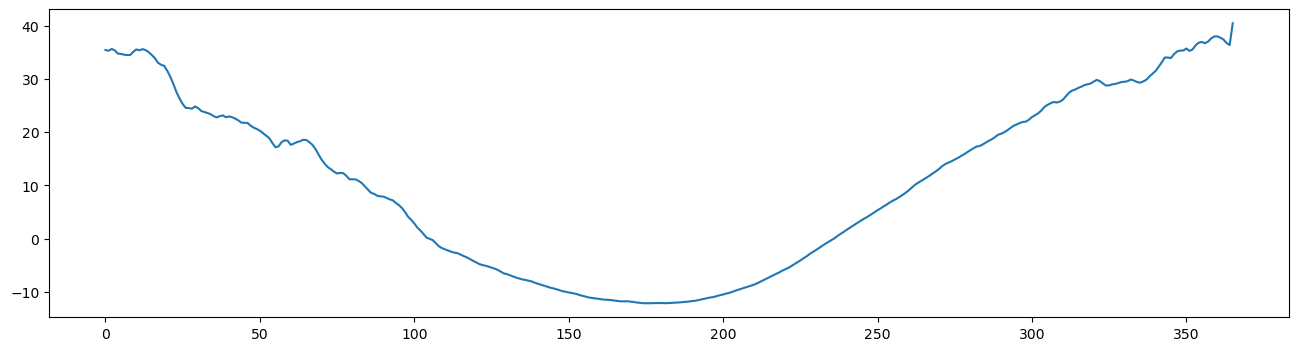

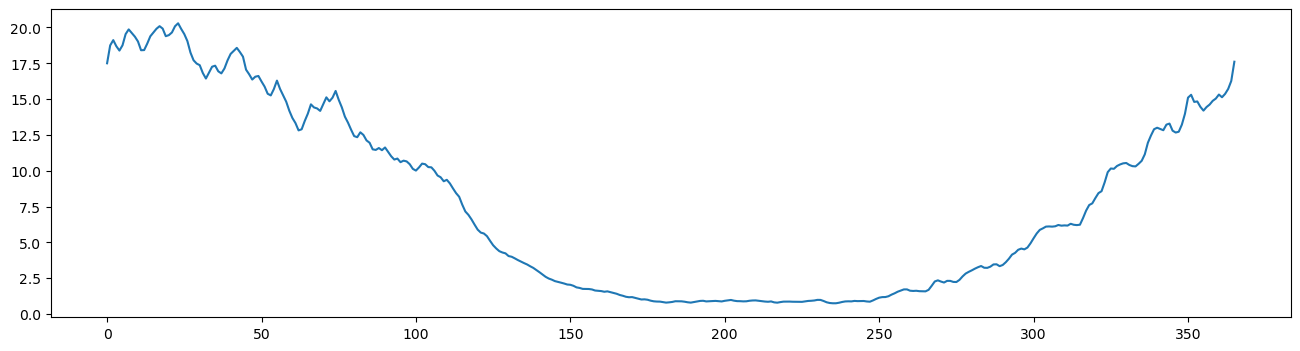

In [10]:
# plot u1060_clim data
fig = plt.figure(figsize =(16, 4))
plt.plot(u1060_clim)

# plot u1060_std data
fig = plt.figure(figsize =(16, 4))
plt.plot(u1060_std)

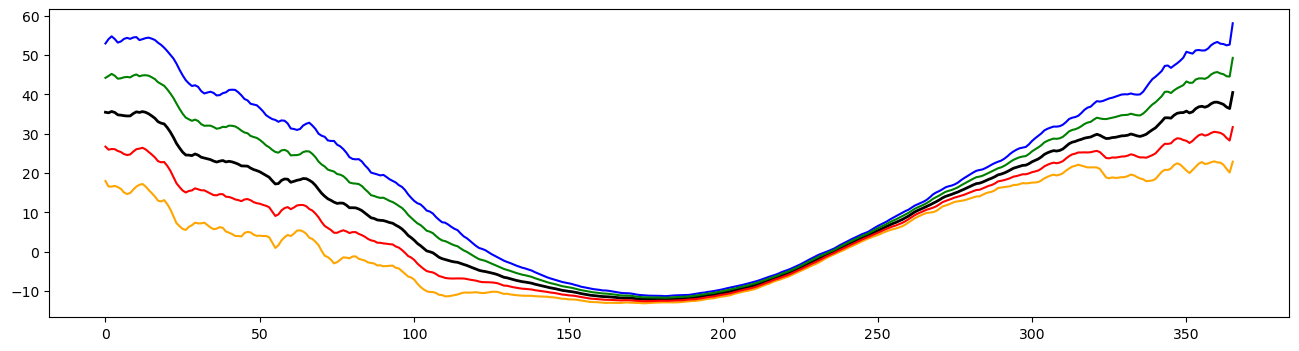

In [12]:
# plot u1060_clim data
fig = plt.figure(figsize =(16, 4))
plt.plot(u1060_clim,'k',linewidth=2)

# add +/- 1 standard deviation of u1060 on top of the daily climatology data
plt.plot(u1060_clim+u1060_std,'blue')
plt.plot(u1060_clim-u1060_std,'orange')

# add +/- 0.5 standard deviation of u1060 on top of the daily climatology data
plt.plot(u1060_clim+0.5*u1060_std,'green')
plt.plot(u1060_clim-0.5*u1060_std,'red')

## Calculate daily anomalies

In [13]:
u1060_anom = data.groupby("time.dayofyear")-u1060_clim
u1060_anom

<xarray.DataArray 'u_component_of_wind' (time: 14610)> Size: 58kB
array([-1.4960213,  2.0800323,  3.2706566, ...,  4.486477 ,  4.137245 ,
        4.8248177], dtype=float32)
Coordinates:
    lat        (time) float64 117kB 60.0 60.0 60.0 60.0 ... 60.0 60.0 60.0 60.0
    plev       (time) float64 117kB 1e+03 1e+03 1e+03 ... 1e+03 1e+03 1e+03
  * time       (time) datetime64[ns] 117kB 1980-01-01T09:00:00 ... 2019-12-31...
    dayofyear  (time) int64 117kB 1 2 3 4 5 6 7 ... 359 360 361 362 363 364 365

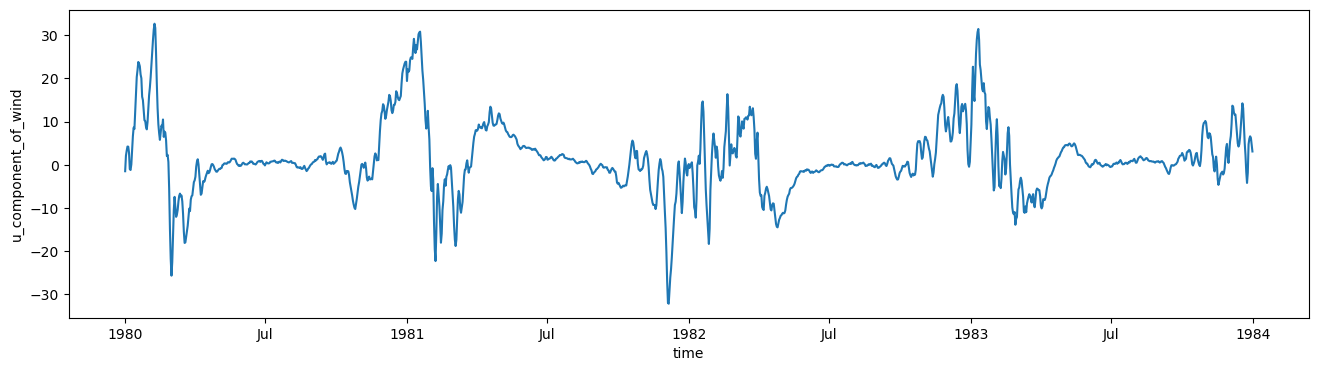

In [15]:
# plot u1060_anom for year 1980-1983
u1060_anom_sel = u1060_anom.sel(time=slice('1980-01-01','1983-12-31'))
fig = plt.figure(figsize =(16, 4))
#plt.plot(u1060_anom_sel)
u1060_anom_sel.plot()

## Calculate running average
### Here we use DataArray.rolling(dim=None, min_periods=None, center=False, **window_kwargs) from xarray. 
### documentation of the function: https://docs.xarray.dev/en/stable/generated/xarray.DataArray.rolling.html

In [17]:
# apply a 15-day running average
u1060_anom_sel_rm = u1060_anom_sel.rolling(time=15, center=True).mean()
u1060_anom_sel_rm

<xarray.DataArray 'u_component_of_wind' (time: 1461)> Size: 6kB
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    lat        (time) float64 12kB 60.0 60.0 60.0 60.0 ... 60.0 60.0 60.0 60.0
    plev       (time) float64 12kB 1e+03 1e+03 1e+03 1e+03 ... 1e+03 1e+03 1e+03
  * time       (time) datetime64[ns] 12kB 1980-01-01T09:00:00 ... 1983-12-31T...
    dayofyear  (time) int64 12kB 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365

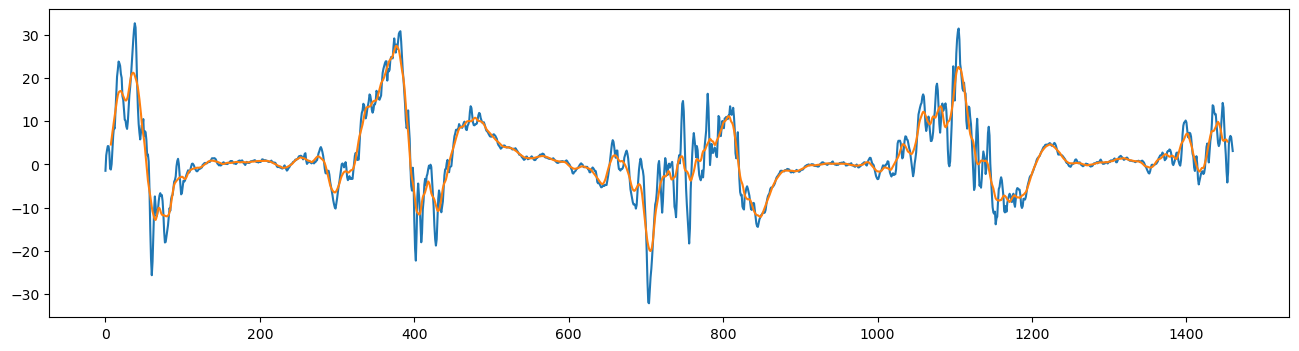

In [19]:
# plot the u1060_anom_1 data
fig = plt.figure(figsize =(16, 4))
plt.plot(u1060_anom_sel)

# plot the u1060_anom_1_rm data on top of it
plt.plot(u1060_anom_sel_rm)